# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
import time
from datetime import date
import numpy as nb

executable_path = ChromeDriverManager().install()

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.78M/6.78M [00:00<00:00, 12.7MB/s]


In [2]:
browser = Browser('chrome', executable_path = executable_path)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

browser.visit(url)
time.sleep(2)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
#Extract full table 
table = soup.find_all('table', class_ = 'table')

In [6]:
# Extract all rows of data
data = soup.find_all('tr', class_ = 'data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows
for rows in data: 
    tags = rows.find_all('td')
    info = [tag.text for tag in tags]
    rows_list.append(info)
rows_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
for header in table:
    tags = header.find_all('th')
    columns = [tag.text for tag in tags]
#     columns_list.append(columns)
columns

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data = rows_list, columns = columns)

In [10]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
mars_df[['id', 'sol', 'ls', 'month']] = mars_df[['id', 'sol', 'ls', 'month']].astype(int)
mars_df[['min_temp', 'pressure']] = mars_df[['min_temp', 'pressure']].astype(float)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], format = '%Y-%m-%d')

In [13]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
mars_df['month'].nunique()

12

In [15]:
# 2. How many Martian days' worth of data are there?
mars_df['sol'].max()

1977

In [16]:
# 3. What is the average low temperature by month?
#group by month then take average of min_temp
grouped_temp = mars_df.groupby(['month'])['min_temp'].mean()

grouped_temp 

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [17]:
#create new dataframe for grouped average min temperature
grouped_temp_df = grouped_temp.reset_index()
grouped_temp_df.rename(columns={'min_temp':'avg_min_temp'}, inplace = True)

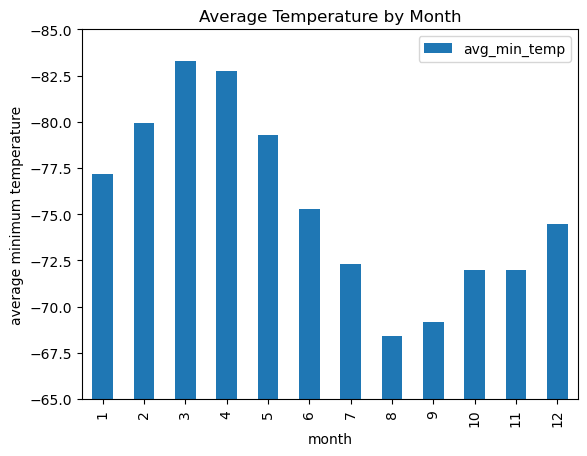

In [18]:
# Plot the average temperature by month
grouped_temp_df.plot(kind = 'bar', x='month', y='avg_min_temp').set_ylim([-65, -85])
plt.title('Average Temperature by Month')
plt.ylabel('average minimum temperature')

#save plot
plt.savefig('outputs/AverageTemp_by_Month.png')

#show plot
plt.show()

In [19]:
# Identify the coldest and hottest months in Curiosity's location
hottest_temp = grouped_temp_df['avg_min_temp'].max()
coldest_temp = grouped_temp_df['avg_min_temp'].min()

hottest_month = grouped_temp_df.loc[grouped_temp_df['avg_min_temp'] == hottest_temp]['month'].iloc[0]
coldest_month = grouped_temp_df.loc[grouped_temp_df['avg_min_temp'] == coldest_temp]['month'].iloc[0]

print(f'The hottest month is month {hottest_month}.')
print(f'The hottest month is month {coldest_month}.')

The hottest month is month 8.
The hottest month is month 3.


In [20]:
# 4. Average pressure by Martian month
grouped_pressure = mars_df.groupby(['month'])['pressure'].mean()
grouped_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [21]:
#create new dataframe for grouped average pressure
grouped_pressure_df = grouped_pressure.reset_index()
grouped_pressure_df.rename(columns={'pressure':'avg_pressure'}, inplace = True)

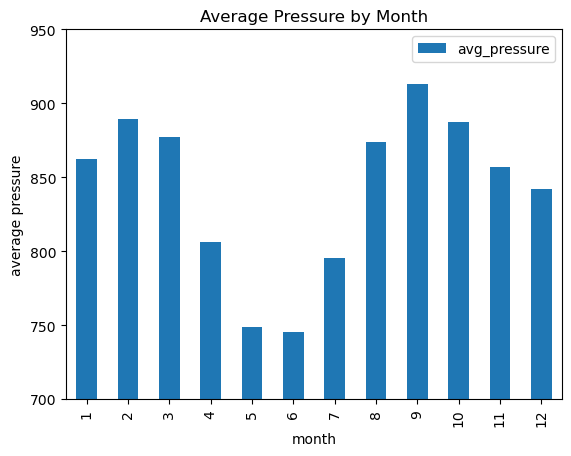

In [22]:
# Plot the average pressure by month
grouped_pressure_df.plot(kind = 'bar', x='month', y='avg_pressure').set_ylim([700, 950])
plt.title('Average Pressure by Month')
plt.ylabel('average pressure')

#save plot
plt.savefig('outputs/AveragePressure_by_Month.png')

#show plot
plt.show()

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?
ls_min = []

for index, row in mars_df.iterrows():
    if row['ls'] == 0:
        ls_min.append(row['terrestrial_date'])

difference = ls_min[2]-ls_min[0]
difference = round(difference / nb.timedelta64(1, 'D'))

print(f'There are {difference} terrestrial days in a Martian year.')

There are 687 terrestrial days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

Looking at the solar longitude (ls) information given in this table, we can assume that a Martian year begins on the first terrestrial day that the ls value is 0.  We also find that the ls value increases by 1  every 2 days.  Therefore we can say that the 1st instance that the ls value is 0 is the first day of the Martian year, and the 3rd instance that the ls value is 0 is the first day of the subsequent martian year.  Thus the number of terrestrial days in a Martian year can be determined by taking the difference of the terrestrial days that these measurements were recorded.  By doing this we're able to determine that there are 687 terrestrial days in a Martian year. 

An internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_df.to_csv('outputs/mars_weather.csv', index=False, header=True)

In [25]:
browser.quit()